In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy import stats as st

from IPython.display import display, Math

# Treating Tardive Dyskinesia
<p> <i>Tardive dyskinesia (TD) </i> is a disorder which involves involuntary and repititive body movements. It affects the nervous system, and oftentimes caused by long terms use of antipsychoitc drugs, which are used to treat neuropsychiatric disorders. 
</p>

<p>
<b>Objective</b>: To evaluate the effectiveness of the drug Deanol in reducing symptoms. <br> 

<b>Preliminary Setup</b>: Drug Deanol and a Placebo treament were given and administered for 4 weeks to 14 patients. <br>

<b>Assessment variable</b>: A Total Severity Index (TSI) score used to measure improvement. Larger the TSI greater the improvements. <br>

<b>Data Collection</b>: The associared data come from    “Double-Blind Evaluation of Deanol in Tardive
Dyskinesia” (Journal of the American Medical Association,1978: 1997–1998).
</p>

In [4]:
data = pd.read_csv('data_sets\TSI.csv')
print("\n Total Severity Index (TSI) ")
data


 Total Severity Index (TSI) 


,Patient,Deanol,Placebo
0,1,12.4,9.2
1,2,6.8,10.2
2,3,12.6,12.2
3,4,13.2,12.7
4,5,12.4,12.1
5,6,7.6,9.0
6,7,12.1,12.4
7,8,5.9,5.9
8,9,12.0,8.5
9,10,1.1,4.8


In [5]:
### Statistical measurement of the data
data.drop(['Patient'],axis=1,inplace=True)
data.describe()

,Deanol,Placebo
count,14.000000,14.000000
mean,9.664286,8.842857
std,3.749791,2.937742
min,1.100000,3.500000
25%,7.000000,6.750000
50%,11.750000,9.050000
75%,12.400000,11.625000
max,13.200000,12.700000


In [6]:
### Deanol Drug
X = data.Deanol.values
n1 = len(X)
### Placebo Treatment
Y = data.Placebo.values
n2 = len(Y)

### Total combined samples
N = n1+n2

## The WALD-WOLFWITZ 2-sample RUNS TEST: 

In [7]:
ties = np.intersect1d(X,Y) ### Elements present in both samples.

d = np.sort(np.hstack((X,Y))) ### Ordered concatenation of X,Y.
index_ties= [[idx for idx,elt in enumerate(d) if elt == ties[itr]] for itr in range(len(ties))]

##### SOLVING Problem of TIES
pattern = np.zeros((n1+n2),dtype=bool)
R = 0
data_masked = np.array([True if value in X else False for value in d])
for temp1 in index_ties[0]:
    temp = data_masked
    temp[index_ties[0]] = True 
    temp[temp1] = False
    for temp2 in index_ties[1]:
        temp[index_ties[1]] = True
        temp[temp2] = False
        for temp3 in index_ties[2]:
            temp[index_ties[2]] = True
            temp[temp3] = False

            ### Calculating the RUNS
            runs = np.logical_xor(temp[1:],temp[:-1]).sum() + 1
            if runs > R:
                R = runs
                pattern[:] = temp ### Don't do pattern = temp then change in temp will cause change in pattern

### Since n1,n2 > 12
### Calculating Z-score
n_prod = 2*n1*n2
n_sum = (n1 + n2)
mu = 1 + n_prod/n_sum
var = (n_prod*(n_prod - n_sum))/(n_sum**2*(n_sum + 1))

alpha = 0.05
### Test Result
Z = (R - mu)/np.sqrt(var)
p = st.norm.cdf(Z)
print('alpha: {}'.format(alpha))
print('Test Statistic, R: {}'.format(R))
print("Z-score: {:.3f}, p-value: {:3f}".format(Z,p))

if p > alpha:
    print("Fail to Reject Null Hypothesis")
else:
    print("Observations are not from same distribution")

alpha: 0.05
Test Statistic, R: 19
Z-score: 1.597, p-value: 0.944834
Fail to Reject Null Hypothesis


## THE KOLMOGOROV-SMIRNOV TWO-SAMPLE TEST

In [8]:
alpha = 0.05
KS_stat_Dmn, p_value = st.ks_2samp(X,Y)
print("Z-score: {:.3f}, p-value: {:3f}".format(KS_stat_Dmn,p_value))
if p > alpha:
    print("Fail to Reject Null Hypothesis")
else:
    print("Observations are not from same distribution")

Z-score: 0.286, p-value: 0.540740
Fail to Reject Null Hypothesis


## THE MEDIAN TEST

In [9]:
d = np.sort(np.hstack((X,Y))) ### Ordered concatenation of X,Y.

### Level of significance:
alpha = 0.05
delta = round(np.median(d),2)
if N%2 == 0:
    t = N/2
else:
    t = (N-1)/2

### Test-Statistic
U = (X <= delta).sum()

mu = n1*t/N
var = n1*n2*t*(N-t)/N**3

### Calculating Z-score
Z = (U - mu)/np.sqrt(var)
print('Test Statistic, U: {:.5f}'.format(U))
print('Z-score: {:.5f}'.format(Z))
print('\np-values:')
print('Right-Tail Alternate Hypothesis: {:.5f}'.format(1-st.norm.cdf(Z)))
print('Left-Tail Alternate Hypothesis: {:.5f}'.format(st.norm.cdf(Z)))
print('Two-Tail Alternate Hypothesis: {:.5f}'.format(2*min(st.norm.cdf(Z),1-st.norm.cdf(Z))))

Test Statistic, U: 5.00000
Z-score: -1.51186

p-values:
Right-Tail Alternate Hypothesis: 0.93471
Left-Tail Alternate Hypothesis: 0.06529
Two-Tail Alternate Hypothesis: 0.13057


## THE MANN WHITNEY TEST 

In [10]:
### Calculating U (Test Statistic):
Dij = []
for Y_j in Y:
    for X_i in X:
        if Y_j < X_i:
            Dij.append(1)
        elif Y_j > X_i:
            Dij.append(0)
        else: ### TIES
            Dij.append(0.5)
U = sum(Dij)
# print(U)

### Asymptotic probability distribution: (Gibbons,2003)
mu = n1*n2/2
var = n1*n2*(N+1)/12

Z = (U - mu)/np.sqrt(var)
print('Test Statistic, U: {:.5f}'.format(U))
print('Z-score: {:.5f}'.format(Z))
print('\np-values:')
print('Two-sided Alternate Hypothesis: {:.5f}'.format(2-2*st.norm.cdf(Z)))
### Satisfies Linear Relation with Wilcoxon Rank Sum

Test Statistic, U: 118.00000
Z-score: 0.91895

p-values:
Two-sided Alternate Hypothesis: 0.35812


## Signed Rank Test

Test Statistic, T: -4.00000
Z-score: -0.12555

p-values:
m_D > 1, Alternate Hypothesis: 0.54996


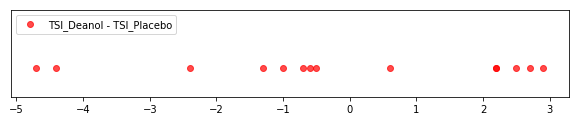

In [30]:
d = np.sort(np.hstack((X,Y))) ### Ordered concatenation of X,Y.

median_diff = 1
diff_XY = X-Y
diff_XY_median_diff = diff_XY - median_diff
diff_XY_sign = [1.0 if elt >= 0 else -1 for elt in diff_XY_median_diff] 

table = np.vstack((diff_XY_sign,diff_XY_median_diff))
table[1] = np.abs(table[1])
table = table[:,table[1,:].argsort()]
table = np.round(table,2)

unique, counts = np.unique(table[1],return_counts=True)

rank = np.array([idx + 1 for idx,elt in enumerate(table[1])]).astype(float)

for idx,elt in enumerate(unique):
    if counts[idx] != 1:
        idx_table = np.where(table[1] == elt)[0][0]
        rank[idx_table:idx_table + counts[idx]] = np.mean(rank[idx_table:idx_table + counts[idx]])
rank = np.multiply(table[0],rank)
T = rank.sum()

### Z-score
mu = 0
var = (n1*(n1+1)*(2*n1+1))/6

Z = (T - mu)/np.sqrt(var)
print('Test Statistic, T: {:.5f}'.format(T))
print('Z-score: {:.5f}'.format(Z))
print('\np-values:')
print('m_D > 1, Alternate Hypothesis: {:.5f}'.format(1-st.norm.cdf(Z)))

###
fig = plt.gcf()
fig.set_size_inches(10, 1.6, forward=True)
frame = plt.gca()
plt.scatter(diff_XY_median_diff,(-5e-2)*np.ones(n2),color='r',alpha = 0.7,label='TSI_Deanol - TSI_Placebo')
plt.ylim(-0.15,0.15)
frame.axes.get_yaxis().set_visible(False)
plt.legend(loc='upper left',ncol=2)
plt.show()

### EFFECTIVENESS FROM slide_8 MA4540

## LOCATION PROBLEM: WILCOXON RANK SUM TEST

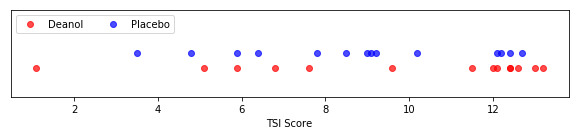

W_N: 223.00000

p-values:
G_Y < F_X: 0.18513
G_Y > F_X: 0.82689
Two-Tail Alternate Hypothesis: 0.34623


In [11]:
d = np.sort(np.hstack((X,Y))) ### Ordered concatenation of X,Y.
ties = np.intersect1d(X,Y) ### Elements present in both samples.

index_ties= [[idx for idx,elt in enumerate(d) if elt == ties[itr]] for itr in range(len(ties))]

rank = np.array([idx + 1 for idx,elt in enumerate(d)]).astype(float)

for k in range(len(index_ties)):
    rank[index_ties[k]] = np.mean(rank[index_ties[k]])

X_in_d = np.array([1 if elt in X else 0 for elt in d])
### Breaking Ties:
for k in range(len(index_ties)):
    X_in_d[index_ties[k][0]] = 0

W = rank[X_in_d == 1].sum()
#### Plotting Figure
fig = plt.gcf()
fig.set_size_inches(10, 1.6, forward=True)
frame = plt.gca()
plt.scatter(X,(-5e-2)*np.ones(n1),color='r',alpha = 0.7,label='Deanol')
plt.scatter(Y,np.zeros(n2),color='b',alpha = 0.7,label='Placebo')
plt.ylim(-0.15,0.15)
frame.axes.get_yaxis().set_visible(False)
plt.legend(loc='upper left',ncol=2)
plt.xlabel('TSI Score')
plt.show()

### Using Continuity Correction
### Z-score:
mu = n1*(N+1)/2
var = n1*n2*(N+1)/12

Z_a1 = (W-0.5-mu)/np.sqrt(var)
Z_a2 = (W+0.5-mu)/np.sqrt(var)
print('W_N: {:0.5f}'.format(W))
print('\np-values:')
print('G_Y < F_X: {:.5f}'.format(1-st.norm.cdf(Z_a1)))
print('G_Y > F_X: {:.5f}'.format(st.norm.cdf(Z_a2)))
print('Two-Tail Alternate Hypothesis: {:.5f}'.format(2*min(st.norm.cdf(Z_a1),1-st.norm.cdf(Z_a2))))

### Satisfies Linear Relation with Mann-Whitney Test

## Mood Test

In [40]:
d_XY = np.sort(np.hstack((X,Y))) ### Ordered concatenation of X,Y.
median_d = np.median(d_XY)

x = X-np.median(X)
y = Y-np.median(Y)
d = np.sort(np.hstack((x,y)))
ties = np.intersect1d(x,y) ### Elements present in both samples.

index_ties= [[idx for idx,elt in enumerate(d) if elt == ties[itr]] for itr in range(len(ties))]

rank = np.array([idx + 1 for idx,elt in enumerate(d)]).astype(float)

for k in range(len(index_ties)):
    rank[index_ties[k]] = np.mean(rank[index_ties[k]])

avg_rank = np.mean(rank)

X_in_d = np.array([1 if elt in x else 0 for elt in d])

### Breaking Ties:
for k in range(len(index_ties)):
    X_in_d[index_ties[k][0]] = 0
M_N = np.sum(np.power(rank-avg_rank,2))

### Z-score
mu = n1*(N**2-1)/12
var = (n1*n2*(N+1)*(N**2-4))/180
Z= (M_N - mu)/np.sqrt(var)
print('M_N: {:0.5f}'.format(M_N))

M_N: 1827.00000


## Measure of Association

### Kendall's Tau Coefficient

In [35]:
A = np.zeros((n1,n2))

for i in range(n1):
    sign_X = np.sign(X - X[i])
    sign_Y = np.sign(Y - Y[i])

    A[i] = np.multiply(sign_X,sign_Y)

P = (A > 0).sum()/2
Q = (A < 0).sum()/2
ties = ((A == 0).sum() - n1)/2
T = (P-Q)/np.sqrt((P+Q+ties)*(P+Q))
### Z-score
Z = 3*T*np.sqrt(n1**2-n1)/np.sqrt(4*n1+10)
print('Test Statistic, T: {:0.5f}'.format(T))
print('Z-score: {}'.format(Z))
print('\np-values:')
print('Positive Independence alternative: {:.5f}'.format(1-st.norm.cdf(Z)))
print('Negative Independence alternative: {:.5f}'.format(st.norm.cdf(Z)))
print('Non-Independence alternative: {:.5f}'.format(2*min(st.norm.cdf(Z),1-st.norm.cdf(Z))))

Test Statistic, T: 0.61879
Z-score: 3.08269854235381

p-values:
Positive Independence alternative: 0.00103
Negative Independence alternative: 0.99897
Non-Independence alternative: 0.00205


### Spearman's Coefficient of Rank Correlation

In [37]:
### Calculating empirical mean & variance of rank(X)
rank_X = np.zeros(n1)
for i in range(n1):
    X_less_x = (X < X[i]).sum()
    X_equal_x = (X == X[i]).sum()
    rank_X[i] = X_less_x + 1.5*(X_equal_x-1) + 1

avg_rk_X = np.mean(rank_X)
var_rk_X = np.sum(np.power(rank_X - avg_rk_X,2))

### Calculating empirical mean & variance of rank(Y)
rank_Y = np.zeros(n2)
for i in range(n2):
    Y_less_y = (Y < Y[i]).sum()
    Y_equal_y = (Y == Y[i]).sum()
    rank_Y[i] = Y_less_y + 1.5*(Y_equal_y-1) + 1

avg_rk_Y = np.mean(rank_Y)
var_rk_Y = np.sum(np.power(rank_Y - avg_rk_Y,2))

R = np.sum(np.multiply(rank_X - avg_rk_X,rank_Y - avg_rk_Y))/np.sqrt(var_rk_X*var_rk_Y)

### Z-score
Z = R/np.sqrt(n1-1)
print('Test Statistic, R: {:0.5f}'.format(R))
print('Z-score: {}'.format(Z))
print('\np-values:')
print('Positive Independence alternative: {:.5f}'.format(1-st.norm.cdf(Z)))
print('Negative Independence alternative: {:.5f}'.format(st.norm.cdf(Z)))
print('Non-Independence alternative: {:.5f}'.format(2*min(st.norm.cdf(Z),1-st.norm.cdf(Z))))

Test Statistic, R: 0.78414
Z-score: 0.21748172014467984

p-values:
Positive Independence alternative: 0.41392
Negative Independence alternative: 0.58608
Non-Independence alternative: 0.82783
